# feature들 간의 상관계수를 알아보기 위한 코드

## 1. 필요한 패키지 import 및 엑셀 데이터 불러오기
### 엑셀 파일의 경우, category의 값을 사전에 값을 바꾸어고, 20만 동의를 받은 경우 output 1, 못 받은 경우는 0으로 설정
- 인권/성평등(0)         
- 정치개혁 (1)          
- 기타 (2)            
- 안전/환경 (3)         
- 문화/예술/체육/언론 (4)    
- 육아/교육 (5)        
- 반려동물  (6)          
- 교통/건축/국토 (7)       
- 보건복지 (8)           
- 행정 (9)            
- 경제민주화  (10)         
- 외교/통일/국방 (11)        
- 미래 (12)             
- 일자리 (13)

In [1]:
import pandas as pd

%matplotlib inline   
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
data = pd.read_excel('C:\\Users\\User\\Desktop\\혜원\\코알라유니브\\해커톤\\media_effect_final_index_changing.xlsx')

In [3]:
data

,title,category,consent,top_5_token,articles,output
0,[청원] 헌법의 평등권의 원칙에 위배되는 여성폭력방지법의 폐기를 청원합니다.,0,155,"['법', '피해자', '범죄', '규정', '보호']",17221,0
1,저희 아파트 경비아저씨의 억울함을 풀어주세요...,0,446434,"['아저씨', '아파트', '주민', '분', '입']",105,1
2,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",5,225764,"['아이', '교사', '팬티', '씨', '사진']",264,1
3,등교 개학 시기를 미루어주시기 바랍니다.,5,255333,"['개학', '등교', '확', '진자', '코로나']",11788,1
4,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,4,273513,"['채널', '승인', '방송', '재', '방송통신']",98,1
...,...,...,...,...,...,...
396,대한민국 특성화고생들에게 제발 희망을 주십시요.,13,60,"['특성화고', '취업', '정부', '정책', '율']",3,0
397,건설현장을 죽음의 쓰나미로 만드는 타워크레인 악법,7,1214,"['사고', '검사', '타워', '국토교통부', '크레인']",1221,0
398,오직 치매에만 신경 쓰고 근무할 수 있도록 해 주십시요,8,1430,"['치매', '센터', '안심', '시', '채용']",1192,0
399,"■김보름 폭로가 ""빙상연맹""적폐잔당의 물타기인지 조사해주세요■",4,142,"['운동', '빙상', '연맹', '전명규', '적폐']",33,0


In [4]:
data[['title','articles', 'category','output']]

,title,articles,category,output
0,[청원] 헌법의 평등권의 원칙에 위배되는 여성폭력방지법의 폐기를 청원합니다.,17221,0,0
1,저희 아파트 경비아저씨의 억울함을 풀어주세요...,105,0,1
2,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",264,5,1
3,등교 개학 시기를 미루어주시기 바랍니다.,11788,5,1
4,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,98,4,1
...,...,...,...,...
396,대한민국 특성화고생들에게 제발 희망을 주십시요.,3,13,0
397,건설현장을 죽음의 쓰나미로 만드는 타워크레인 악법,1221,7,0
398,오직 치매에만 신경 쓰고 근무할 수 있도록 해 주십시요,1192,8,0
399,"■김보름 폭로가 ""빙상연맹""적폐잔당의 물타기인지 조사해주세요■",33,4,0


# CASE1 : 모든 feature들에 가중치 부여 X
## 2. category, consent, articles, output 간의 상관계수 히트맵 그리기

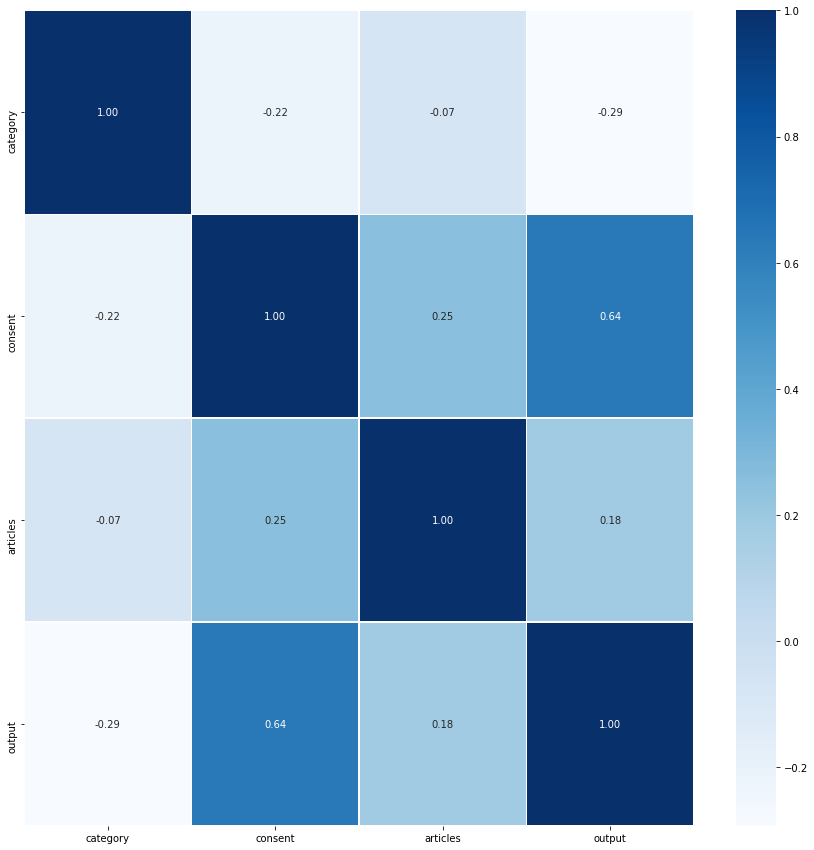

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [6]:
data.corr()

,category,consent,articles,output
category,1.000000,-0.219286,-0.071641,-0.292434
consent,-0.219286,1.000000,0.253621,0.639728
articles,-0.071641,0.253621,1.000000,0.182037
output,-0.292434,0.639728,0.182037,1.000000


# CASE2 : category, articles 가중치 부여
## 3. 카테고리 값에 가중치 부여
### (가중치 값은 사전에 분야별로 답변이 완료된 청원이 몇 개 인지를 코드로 확인하여 구한 값입니다.)

In [7]:
data.loc[ data['category']== 0, 'category'] = 31
data.loc[ data['category']== 1, 'category'] = 20
data.loc[ data['category']== 2, 'category'] = 19
data.loc[ data['category']== 3, 'category'] = 17
data.loc[ data['category']== 4, 'category'] = 12
data.loc[ data['category']== 5, 'category'] = 11
data.loc[ data['category']== 6, 'category'] = 6
data.loc[ data['category']== 7, 'category'] = 4
data.loc[ data['category']== 8, 'category'] = 4
data.loc[ data['category']== 9, 'category'] = 3
data.loc[ data['category']== 10, 'category'] = 2
data.loc[ data['category']== 11, 'category'] = 2
data.loc[ data['category']== 12, 'category'] = 1
data.loc[ data['category']== 13, 'category'] = 1

In [8]:
data

,title,category,consent,top_5_token,articles,output
0,[청원] 헌법의 평등권의 원칙에 위배되는 여성폭력방지법의 폐기를 청원합니다.,31,155,"['법', '피해자', '범죄', '규정', '보호']",17221,0
1,저희 아파트 경비아저씨의 억울함을 풀어주세요...,31,446434,"['아저씨', '아파트', '주민', '분', '입']",105,1
2,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",2,225764,"['아이', '교사', '팬티', '씨', '사진']",264,1
3,등교 개학 시기를 미루어주시기 바랍니다.,2,255333,"['개학', '등교', '확', '진자', '코로나']",11788,1
4,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,1,273513,"['채널', '승인', '방송', '재', '방송통신']",98,1
...,...,...,...,...,...,...
396,대한민국 특성화고생들에게 제발 희망을 주십시요.,1,60,"['특성화고', '취업', '정부', '정책', '율']",3,0
397,건설현장을 죽음의 쓰나미로 만드는 타워크레인 악법,4,1214,"['사고', '검사', '타워', '국토교통부', '크레인']",1221,0
398,오직 치매에만 신경 쓰고 근무할 수 있도록 해 주십시요,4,1430,"['치매', '센터', '안심', '시', '채용']",1192,0
399,"■김보름 폭로가 ""빙상연맹""적폐잔당의 물타기인지 조사해주세요■",1,142,"['운동', '빙상', '연맹', '전명규', '적폐']",33,0


## 4. 상관계수 히트맵 그리기

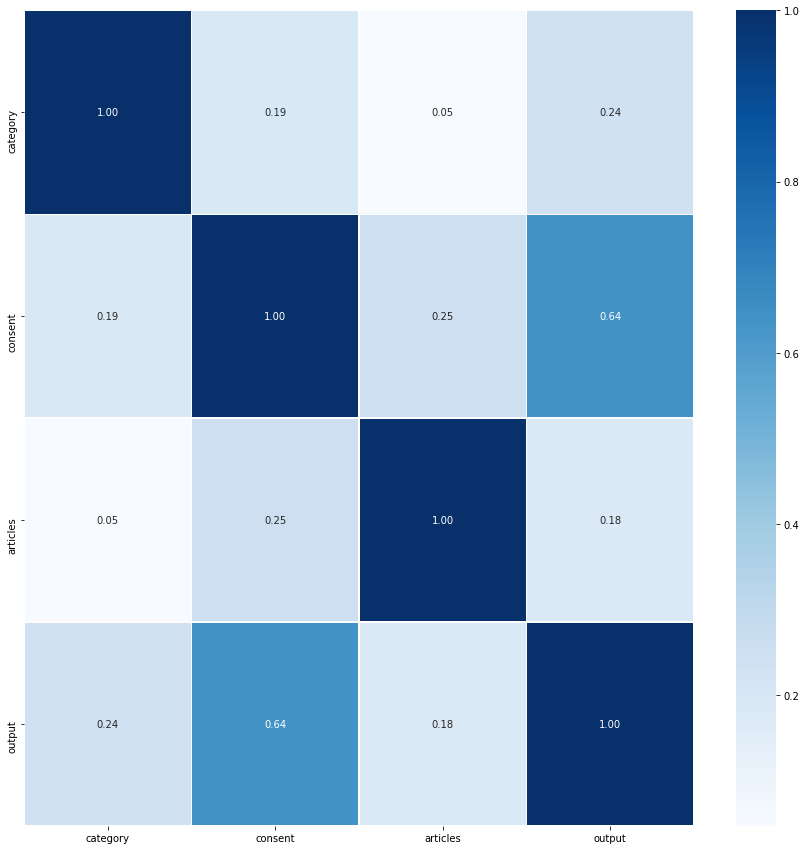

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [10]:
data.corr()

,category,consent,articles,output
category,1.000000,0.192381,0.047296,0.238344
consent,0.192381,1.000000,0.253621,0.639728
articles,0.047296,0.253621,1.000000,0.182037
output,0.238344,0.639728,0.182037,1.000000


### category 값 범주화

In [11]:
data.loc[ (data['category']>=1) & (data['category']<=3), 'category'] = 0
data.loc[ (data['category']>=4) & (data['category']<=11), 'category'] = 1
data.loc[ (data['category']>=12) & (data['category']<=19), 'category'] = 2
data.loc[ (data['category']>=20) & (data['category']<=31), 'category'] = 3

In [12]:
data

,title,category,consent,top_5_token,articles,output
0,[청원] 헌법의 평등권의 원칙에 위배되는 여성폭력방지법의 폐기를 청원합니다.,3,155,"['법', '피해자', '범죄', '규정', '보호']",17221,0
1,저희 아파트 경비아저씨의 억울함을 풀어주세요...,3,446434,"['아저씨', '아파트', '주민', '분', '입']",105,1
2,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",0,225764,"['아이', '교사', '팬티', '씨', '사진']",264,1
3,등교 개학 시기를 미루어주시기 바랍니다.,0,255333,"['개학', '등교', '확', '진자', '코로나']",11788,1
4,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,0,273513,"['채널', '승인', '방송', '재', '방송통신']",98,1
...,...,...,...,...,...,...
396,대한민국 특성화고생들에게 제발 희망을 주십시요.,0,60,"['특성화고', '취업', '정부', '정책', '율']",3,0
397,건설현장을 죽음의 쓰나미로 만드는 타워크레인 악법,1,1214,"['사고', '검사', '타워', '국토교통부', '크레인']",1221,0
398,오직 치매에만 신경 쓰고 근무할 수 있도록 해 주십시요,1,1430,"['치매', '센터', '안심', '시', '채용']",1192,0
399,"■김보름 폭로가 ""빙상연맹""적폐잔당의 물타기인지 조사해주세요■",0,142,"['운동', '빙상', '연맹', '전명규', '적폐']",33,0


In [13]:
data['category'].value_counts()

0    132
3    109
2     88
1     72
Name: category, dtype: int64

## 5. articles 값 범주화

In [14]:
data['articles'].describe()

count       401.000000
mean       2842.628429
std       11972.572880
min           0.000000
25%          18.000000
50%         150.000000
75%        1204.000000
max      113835.000000
Name: articles, dtype: float64

In [15]:
data.loc[ (data['articles']>=0) & (data['articles']<=18), 'articles'] = 0
data.loc[ (data['articles']>=19) & (data['articles']<=150), 'articles'] = 1
data.loc[ (data['articles']>=151) & (data['articles']<=1204), 'articles'] = 2
data.loc[ (data['articles']>=1205) & (data['articles']<=113835), 'articles'] = 3

data

,title,category,consent,top_5_token,articles,output
0,[청원] 헌법의 평등권의 원칙에 위배되는 여성폭력방지법의 폐기를 청원합니다.,3,155,"['법', '피해자', '범죄', '규정', '보호']",3,0
1,저희 아파트 경비아저씨의 억울함을 풀어주세요...,3,446434,"['아저씨', '아파트', '주민', '분', '입']",1,1
2,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",0,225764,"['아이', '교사', '팬티', '씨', '사진']",2,1
3,등교 개학 시기를 미루어주시기 바랍니다.,0,255333,"['개학', '등교', '확', '진자', '코로나']",3,1
4,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,0,273513,"['채널', '승인', '방송', '재', '방송통신']",1,1
...,...,...,...,...,...,...
396,대한민국 특성화고생들에게 제발 희망을 주십시요.,0,60,"['특성화고', '취업', '정부', '정책', '율']",0,0
397,건설현장을 죽음의 쓰나미로 만드는 타워크레인 악법,1,1214,"['사고', '검사', '타워', '국토교통부', '크레인']",3,0
398,오직 치매에만 신경 쓰고 근무할 수 있도록 해 주십시요,1,1430,"['치매', '센터', '안심', '시', '채용']",2,0
399,"■김보름 폭로가 ""빙상연맹""적폐잔당의 물타기인지 조사해주세요■",0,142,"['운동', '빙상', '연맹', '전명규', '적폐']",1,0


In [16]:
data['articles'].value_counts()

0    103
3    100
2    100
1     98
Name: articles, dtype: int64

In [17]:
data

,title,category,consent,top_5_token,articles,output
0,[청원] 헌법의 평등권의 원칙에 위배되는 여성폭력방지법의 폐기를 청원합니다.,3,155,"['법', '피해자', '범죄', '규정', '보호']",3,0
1,저희 아파트 경비아저씨의 억울함을 풀어주세요...,3,446434,"['아저씨', '아파트', '주민', '분', '입']",1,1
2,"울산 초등학교 1학년 아이에게 팬티빨기 숙제내고 학생 사진에 '섹시팬티', '공주님...",0,225764,"['아이', '교사', '팬티', '씨', '사진']",2,1
3,등교 개학 시기를 미루어주시기 바랍니다.,0,255333,"['개학', '등교', '확', '진자', '코로나']",3,1
4,방송통신위원회는 방송의 공적 책임 방기하고 언론이기를 포기한 채널A와 TV조선의 ...,0,273513,"['채널', '승인', '방송', '재', '방송통신']",1,1
...,...,...,...,...,...,...
396,대한민국 특성화고생들에게 제발 희망을 주십시요.,0,60,"['특성화고', '취업', '정부', '정책', '율']",0,0
397,건설현장을 죽음의 쓰나미로 만드는 타워크레인 악법,1,1214,"['사고', '검사', '타워', '국토교통부', '크레인']",3,0
398,오직 치매에만 신경 쓰고 근무할 수 있도록 해 주십시요,1,1430,"['치매', '센터', '안심', '시', '채용']",2,0
399,"■김보름 폭로가 ""빙상연맹""적폐잔당의 물타기인지 조사해주세요■",0,142,"['운동', '빙상', '연맹', '전명규', '적폐']",1,0


## 6. 상관계수 히트맵 그리기

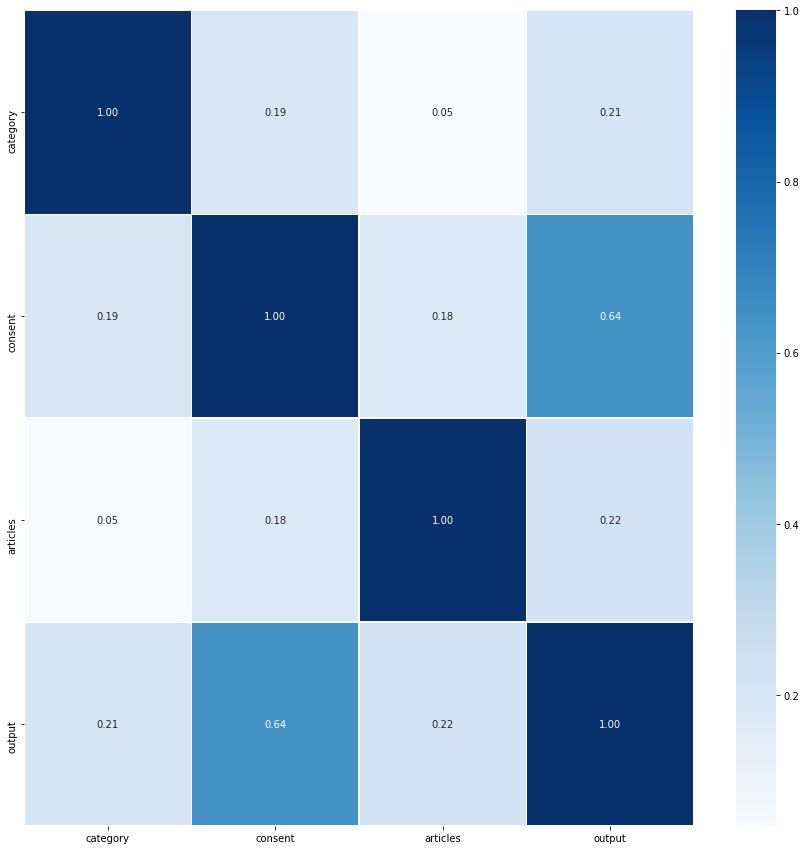

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [19]:
data.corr()

,category,consent,articles,output
category,1.000000,0.194147,0.047075,0.212583
consent,0.194147,1.000000,0.181064,0.639728
articles,0.047075,0.181064,1.000000,0.224684
output,0.212583,0.639728,0.224684,1.000000
